In [1]:
import rebound
import reboundx
import matplotlib.pyplot as plt
import numpy as np

# Collisional Fragmentation Module

With REBOUNDx you can load different collision resolve modules. The "fragmenting_collisions" module is based on simulations done by [Leinhardt & Stewart (2012)](https://iopscience.iop.org/article/10.1088/0004-637X/745/1/79/meta).

In this module, once a collision is detected, the outcome will be determined based on the impact velocity, impact angle, and the masses of the colliding bodies. We will call the more massive body "target" and the less massive "projectile". For the descision tree of collision outcomes refer to the documentation. We will briefly discuss the different collision outcomes in the next parts in this notebook.

Each particle in the simulation, has a unique ID (`fc_id`). Everytime a collision happens, the target and projectile are removed, and the particles after the collision will have new IDs. 

When you add particles in the start of the simulation, by default they will be assigned integer IDs from 1 to N, where N is the number of your particles. You can also setup the initial particle IDs if you wish to do so. 

To use the collision module, we need to provide the following inputs:

## Inputs

1. Minimum fragment mass (`fc_min_frag_mass`): Fragment masses are derived randomly from a powerlaw distribution. A minimum allowed fragment mass needs to be chosen by the user. 

2. Output file name (`fc_particle_list_file`): If you wish to print the output file you need to set the output file name (e.g. `your_output_file_name.csv`)


## Outputs
Particle list file (`your_output_file_name.csv`).

Each row in this file corresponds to a "child particle" created after the collision. Each child is created from a collision at time `t`, of a certain `type` based on the flowchart. The target and projectile will be the "parents" in the collision (we call them parent1 and parent2, and that does not imply which one is target. To identify target you need to look at their masses; target has the higher mass). Once the collision happens, parents will be removed and "child" particles will be added. Therefore, each collision has unique parent IDs and can be identifies with the pair (`parent1_id`, `parent2_id`). 

The columns of the output file are as follows:


`t`: time (in your units of choice)

`type`: collision type, refer to decision tree

`new_id`: new particle's ID

`parent1_id`: new particle's parent 1 ID

`parent2_id`: new particle's parent 2 ID

`new_mass`: new particle's mass

`parent1_mass`: parent 1 mass

`parent2_mass`: parent 2 mass

`new_radius`: new particle's radius

`parent1_radius`: parent 1 radius

`parent2_radius`: parent 2 radius

`v_imp`: impact velocity

`theta_imp`: impact angle

# Example 1: two particles colliding

Now let's start the simulation and add particles.

In [2]:
sim = rebound.Simulation()
rebx = reboundx.Extras(sim)
# Load "fragmenting_collisions" as the collision resolve module
collision_resolve = rebx.load_collision_resolve("fragmenting_collisions")
rebx.add_collision_resolve(collision_resolve)

# Set up minimum fragment mass
collision_resolve.params["fc_min_frag_mass"] = 0.001

# Set up output file name
# ??

# Add particles
# This example will result in erosion of the target.

sim.add(m=0.15, r=1.0, x=0)
sim.add(m=0.10, r=1.0, x=10.0, vx=-30.0, vy=0.001, vz=0.001)


sim.particles[0].r = 1.0
sim.particles[1].r = 1.0

# Other simulation setups
sim.dt = 0.1
sim.integrator = "mercurius"
sim.collision = "direct"

print("Before collision, N = ", sim.N)
print(f"m1 = {sim.particles[0].m:.2f} and m2 = {sim.particles[1].m:.2f}")

# Integrate
integration_time = 1
sim.integrate(integration_time)

print("After collision, N = ", sim.N)
for i in range(sim.N):
    print(f"m{i+1} = {sim.particles[i].m:.2f}")

Before collision, N =  2
m1 = 0.15 and m2 = 0.10
Non grazing, lr_mass < M_t. Erosion. (Case 4, D)
After collision, N =  5
m1 = 0.09
m2 = 0.05
m3 = 0.05
m4 = 0.04
m5 = 0.02


# Example 2 : a disk of planetesimals

Now we can add more particles and create a planetesimal disk. The planetesimals will collide with one another and the collision outcome will be determined based on the decision tree. 

In [49]:
sim = rebound.Simulation()
rebx = reboundx.Extras(sim)
# Load "fragmenting_collisions" as the collision resolve module
collision_resolve = rebx.load_collision_resolve("fragmenting_collisions")
rebx.add_collision_resolve(collision_resolve)

# Set up minimum fragment mass
collision_resolve.params["fc_min_frag_mass"] = 0.001

#sim.units = ('yr', 'AU', 'Msun')
sim.add(m = 1)
sim.dt = 0.1

n_pl = 3 # Number of planetesimals

# planetesimal mass range
lunar_mass  = 3.8e-8    # solar masses
earth_mass  = 3e-6      # solar masses
mass_min    = 0.5 * lunar_mass
mass_max    = 0.1 * earth_mass

rho = 5.05e6   # units of solMass/AU^3, equal to ~3 g/cm^3

# Add 30 planetary embryos
for i in range(n_pl):
    a   = np.random.uniform(0.1, 0.101)             # semi-major axis in AU
    e   = np.random.uniform(0.0, 0.5)            # eccentricity
    inc = np.random.uniform(0.0, np.pi)     # inclination in radians
    m   = 0.1  # mass in solar masses
    #r = ((3*m)/(4*np.pi*rho))**(1/3) * 10              # radius in AU
    r = 1
    Omega = np.random.uniform(0.0, np.pi)
    #f = np.random.uniform(0.0, np.pi/180.0)
    sim.add(m=m, r=r, a=a, e=e, inc=inc, Omega=Omega)

sim.move_to_com()

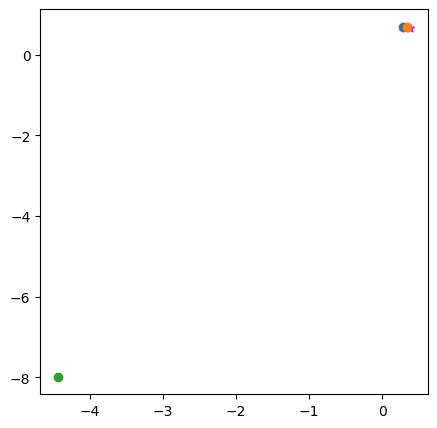

In [56]:
sim.move_to_com()

plt.figure(figsize=(5,5))

plt.scatter(sim.particles[0].x, sim.particles[0].y, marker='*', color = 'magenta')
for i in range(1, sim.N):
    plt.scatter(sim.particles[i].x, sim.particles[i].y)


#plt.xlim(-0.2,0.2)
#plt.ylim(-0.2,0.2)

In [43]:
sim.N

4

In [44]:
sim.particles[2].m

0.1

In [55]:
integration_time = 10

sim.integrate(integration_time)